# Linear Regression on Salaries

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
%matplotlib inline

## Read the employee data

The employee data contains years of experience, skill rating, and salary.

In [8]:
import numpy as np

# Read a tab-delimited file of employee data as a dataframe.

employees_df = pd.read_csv ("salaries_exercise.tsv", header=0, sep = "\t")
employees_df.head()

,YEARS_EXPERIENCE,SKILLS_RATING_PERCENTILE,SALARY
0,3.58,95,48000
1,3.42,91,43200
2,4.18,96,69400
3,4.00,97,66800
4,4.15,95,72400


## Data preprocessing

Check that there are no missing values in all of the columns

In [9]:
employees_df.isnull().sum()

YEARS_EXPERIENCE            0
SKILLS_RATING_PERCENTILE    0
SALARY                      0
dtype: int64

## Data Visualization

### Histogram of salaries

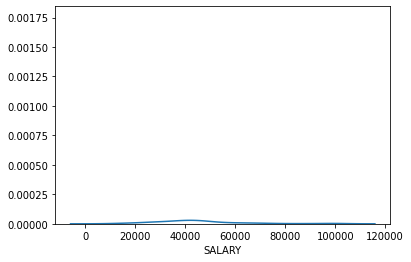

In [10]:
# set the size of the figure
#sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a showing the distribution of salaries
sns.distplot (employees_df['SALARY'], bins=5000)
plt.show()

### Scatter plot of salary and another variable

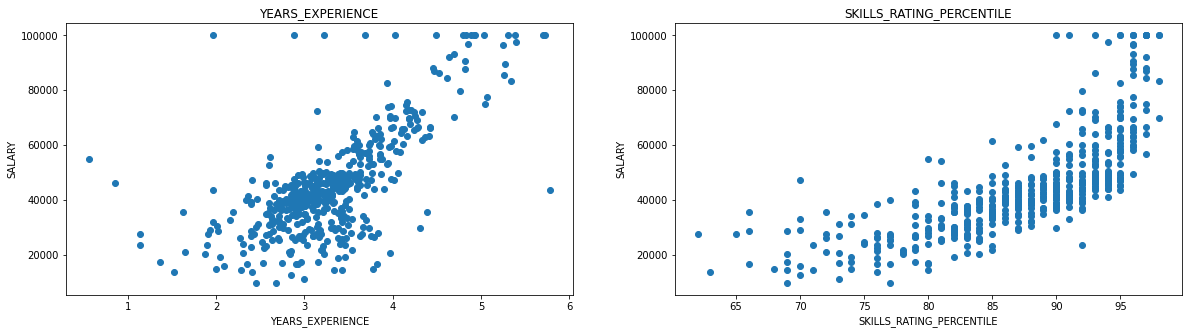

In [11]:
plt.figure(figsize=(20, 5))

features = ['YEARS_EXPERIENCE', 'SKILLS_RATING_PERCENTILE']
target = employees_df['SALARY']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = employees_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('SALARY')

Years of experience and skills rating are correlated with salary. Therefore, these variables can be used to predict salary.

## Build a linear regression model

### Prepare the data for training

In [12]:
X = pd.DataFrame(np.c_[employees_df['YEARS_EXPERIENCE'], employees_df['SKILLS_RATING_PERCENTILE']], 
                 columns = ['YEARS_EXPERIENCE','SKILLS_RATING_PERCENTILE'])
Y = employees_df['SALARY'] # Salary is what we're trying to predict

Split the data into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Train the model using sklearn LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [15]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 11299.97415740853
R2 score is 0.6283850622993297


The model performance for testing set
--------------------------------------
RMSE is 10233.069128733265
R2 score is 0.6656324897264172


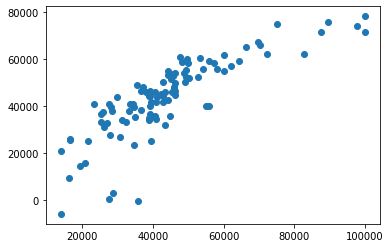

In [16]:
# plotting the y_test vs y_pred
# ideally it's a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

In [17]:
# the new hire's resume
new_employee = {"YEARS_EXPERIENCE": [5],
                "SKILL_RATING_PERCENTILE": [90]}

# convert to dataframe
new_employee_df = pd.DataFrame.from_dict (new_employee)

new_employee_df.head()

,YEARS_EXPERIENCE,SKILL_RATING_PERCENTILE
0,5,90


### Use the linear regression model to predict the new employee's salary

In [18]:
new_employee_salary_prediction = lin_model.predict(new_employee_df)

# round the salary to the nearest dollar
new_employee_salary_prediction = new_employee_salary_prediction.round (decimals=0)

print (new_employee_salary_prediction)

[64666.]


This new employee can make $64,666. Is it suspicious that he took this job?